## Minidesafio

```
Consigna

Durante los foros efectuados, surgió como necesidad el analizar el impacto que han tenido las siguientes palabras durante los últimos 5 años dentro de los países participantes en esta cumbre: ["Sea Level", Wheater",'Temperatures','Carbon Dioxide','Global Warming']:1. Acceder a la herramienta Pytrends y buscar las tendencias de las palabras mencionadas para cada país (Seleccionar por lo menos 5 países)
2. Generar un dataframe para cada país donde se alojen los resultados
3. CCrear una base de datos llamada FIN_DEL_MUNDO en Redshtif
4. Conectarte por medio de SQLAlchemy a la base de datos
5. Crear una tabla con el nombre asociado al código de dos dígitos (https://www.iban.com/country-codes)  para cada país dentro de la base de datos, que contenga los resultados obtenidos de Pytrends 

 

```

In [4]:
!pip install pytrends

import pandas as pd                        
from pytrends.request import TrendReq
# La función TrendReq() permite hacer un primer filtrado de los datos que vamos a solicitar.
pytrend = TrendReq()

In [18]:
# Conectamos con Google Trends y le pasamos unos parámetros base, En este caso, solo indicamos el idioma para acceder a Google Trends 
pytrends = TrendReq(hl='ES')

#Establecemos una variable lista que incluya la palabra o palabras que queremos analizar
lista_palabras = ["Sea Level","Wheater","Temperatures","Carbon Dioxide","Global Warming"]

# Abreviaciones de paises 2 carcteres: https://laendercode.net/en/2-letter-list.html
#Asigno los paises 
paises = ["US","CN","DE","FR","ES"]

[     Sea Level  Wheater  Temperatures  Carbon Dioxide  Global Warming País   
 0           11        2            25              17              16   US  \
 1           12        2            26              14              11   US   
 2           13        2            27              12              12   US   
 3           10        2            29              12              10   US   
 4           12        2            37              10              11   US   
 ..         ...      ...           ...             ...             ...  ...   
 256         19        2            41              48              23   US   
 257         19        2            42              46              23   US   
 258         19        2            39              40              22   US   
 259         15        1            30              33              16   US   
 260         14        0            29              14               6   US   
 
          Fecha  
 0   2018-06-03  
 1   2018-06-1

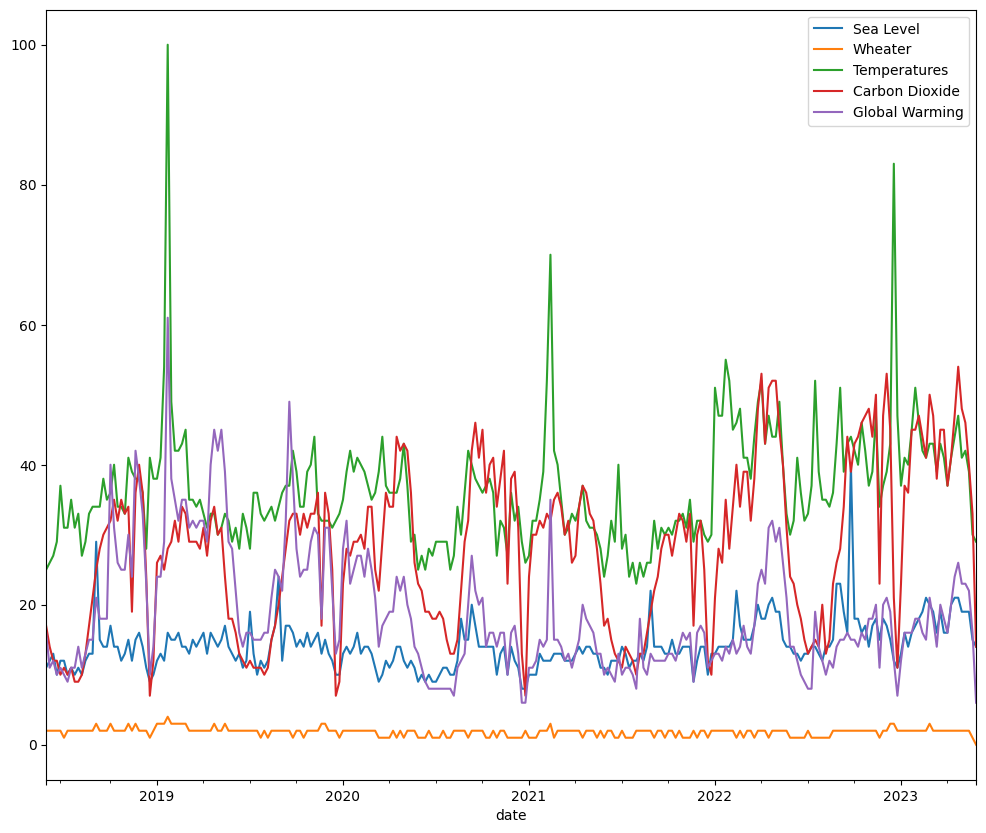

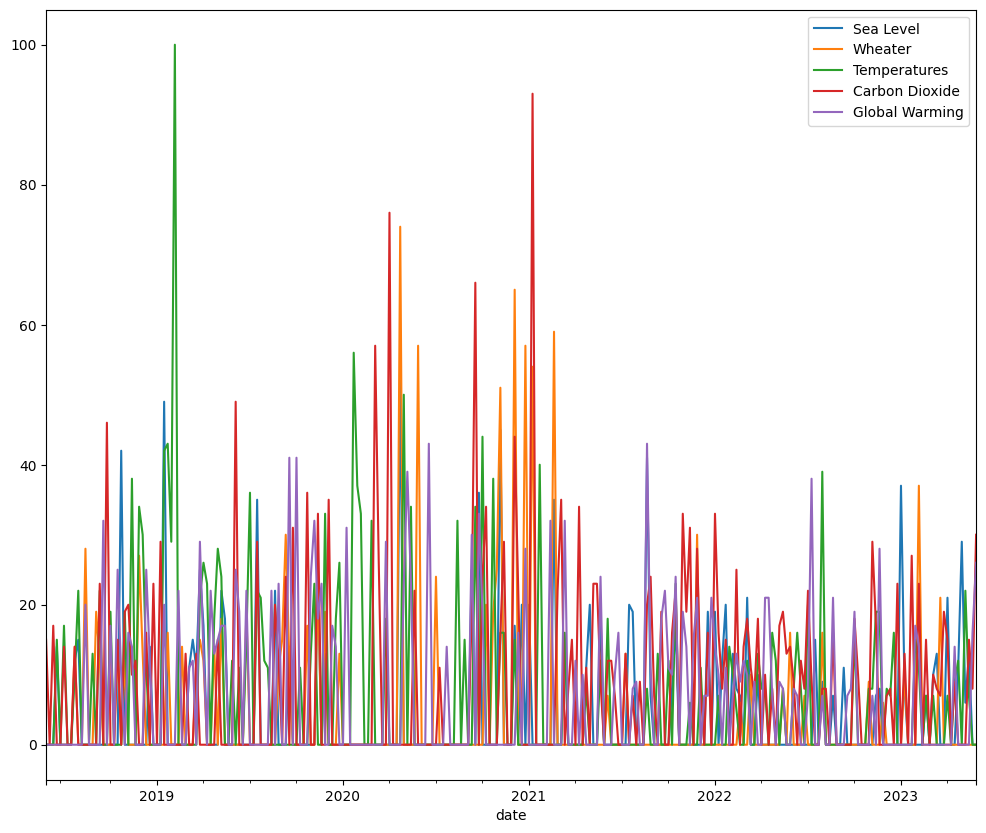

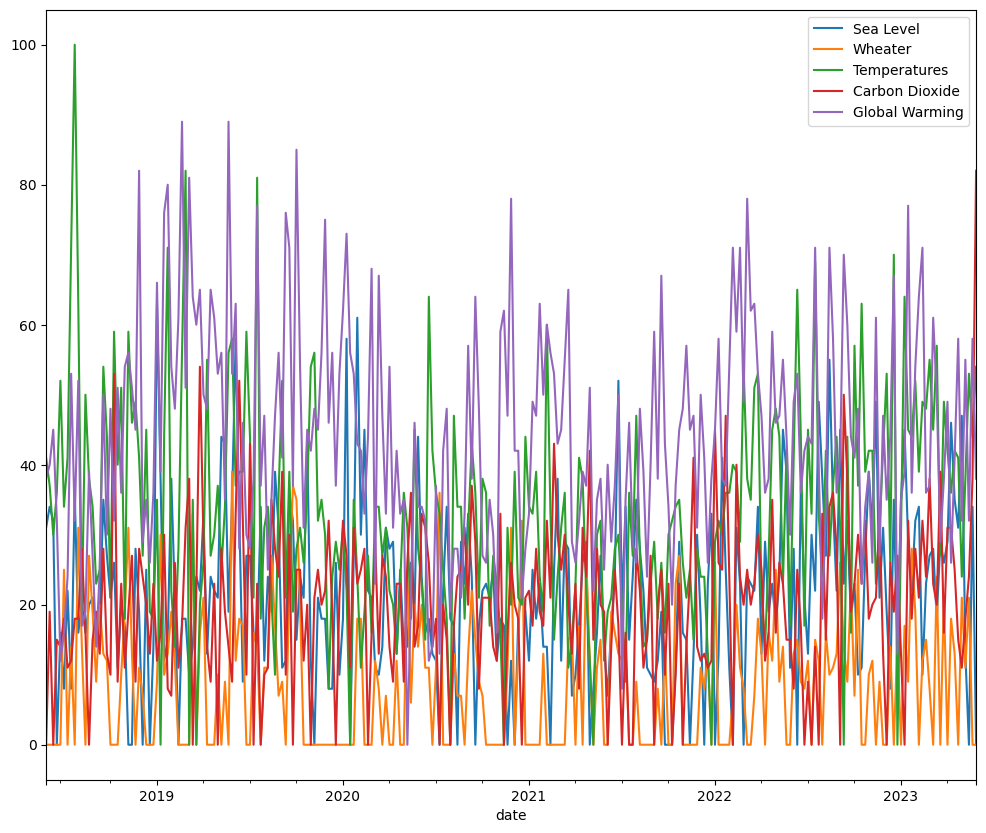

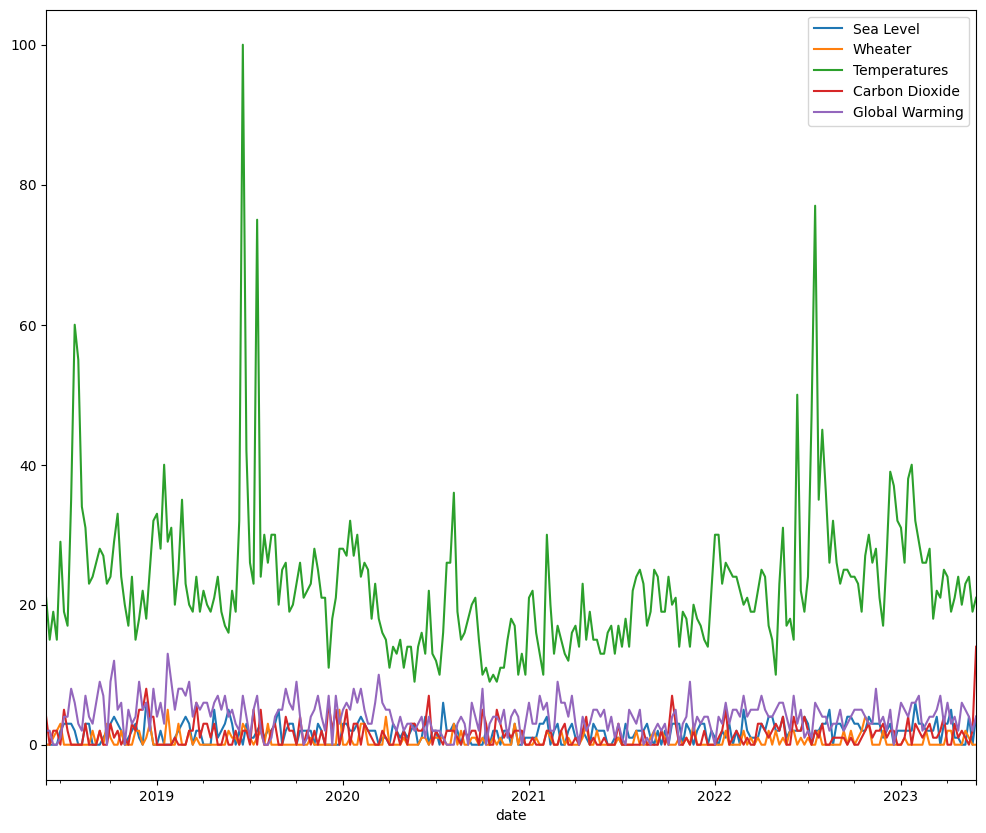

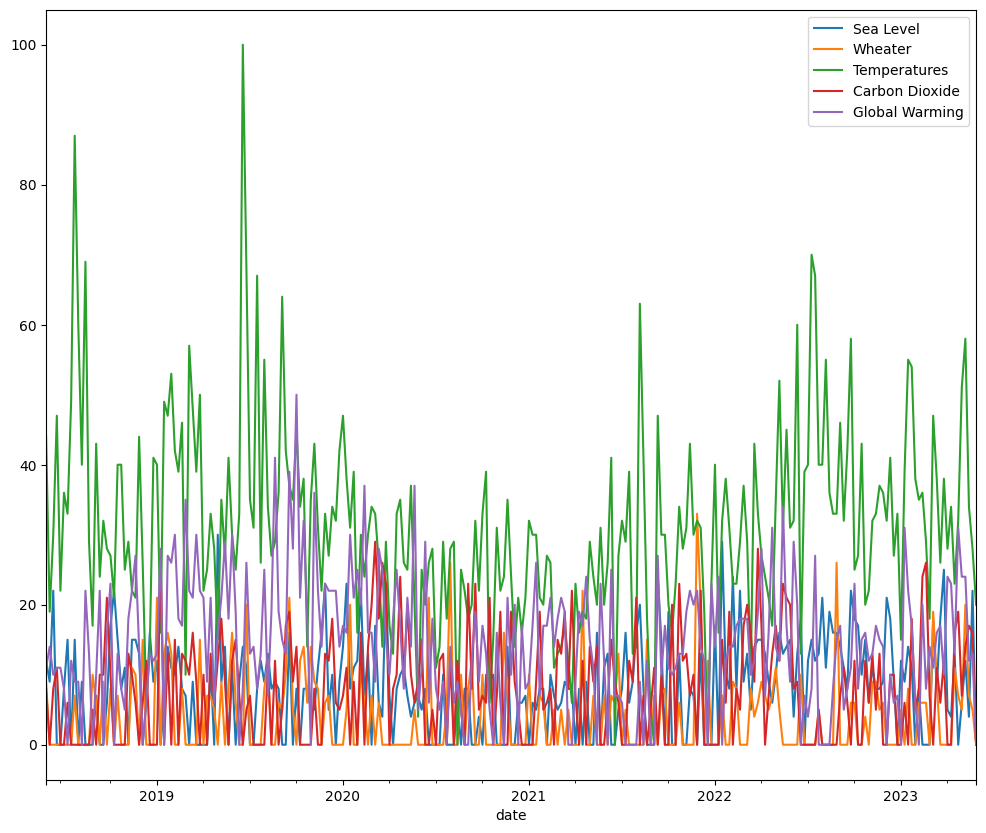

In [27]:
# para almacenar los dataframes en cada pais
lista_dfs=[]
#Pasamos todos los parámetros que queremos a la solicitud (filtrado), con el for recorremos la lista de paises
for i in paises:
    pytrends.build_payload(lista_palabras, cat=0, timeframe="today 5-y", geo=i)
    #librería de matplotlib para pasar estos datos a un gráfico 
    df = pytrends.interest_over_time()[lista_palabras]
    df.plot(figsize=(12, 10), y=lista_palabras)
    # Agregar columna de pais de interes
    df['País']= i
    # Crear columna fecha en el dataframe
    df['Fecha']= df.index
    # Resetear el indice
    df= df.reset_index(drop=True)
    # Agregar a la lista vacia
    lista_dfs.append(df)

lista_dfs

[     Sea Level  Wheater  Temperatures  Carbon Dioxide  Global Warming País   
 0           11        2            25              17              16   US  \
 1           12        2            26              14              11   US   
 2           13        2            27              12              12   US   
 3           10        2            29              12              10   US   
 4           12        2            37              10              11   US   
 ..         ...      ...           ...             ...             ...  ...   
 256         19        2            41              48              23   US   
 257         19        2            42              46              23   US   
 258         19        2            39              40              22   US   
 259         15        1            30              33              16   US   
 260         14        0            29              14               6   US   
 
          Fecha  
 0   2018-06-03  
 1   2018-06-1

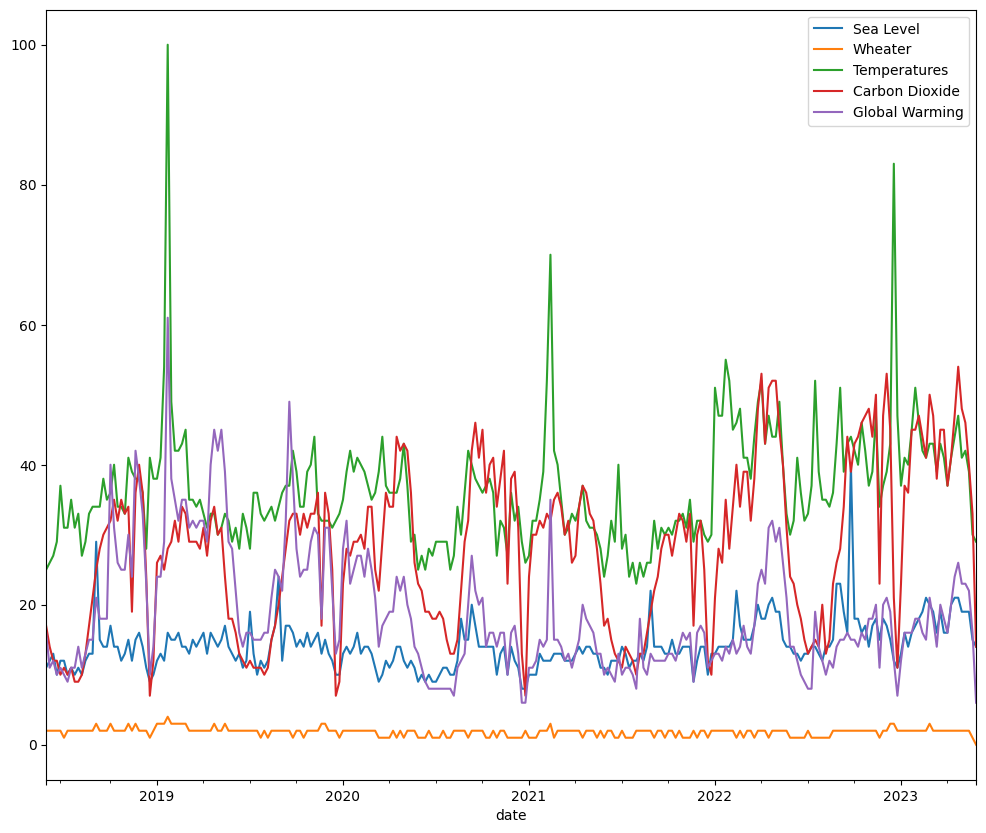

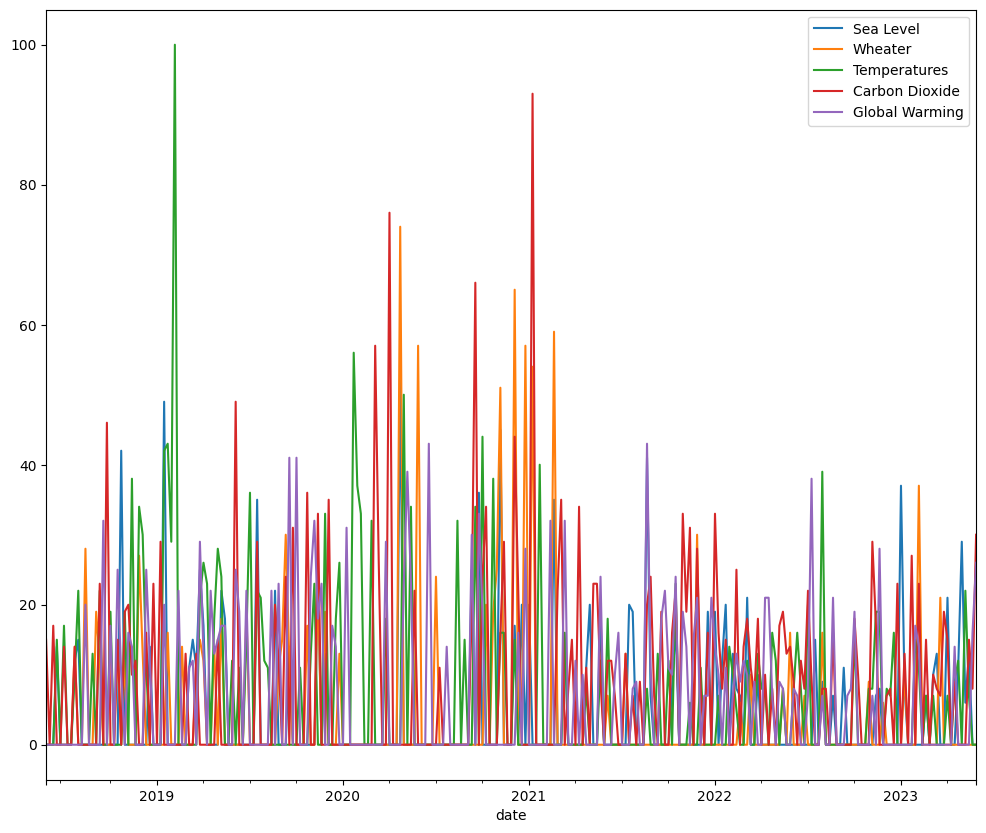

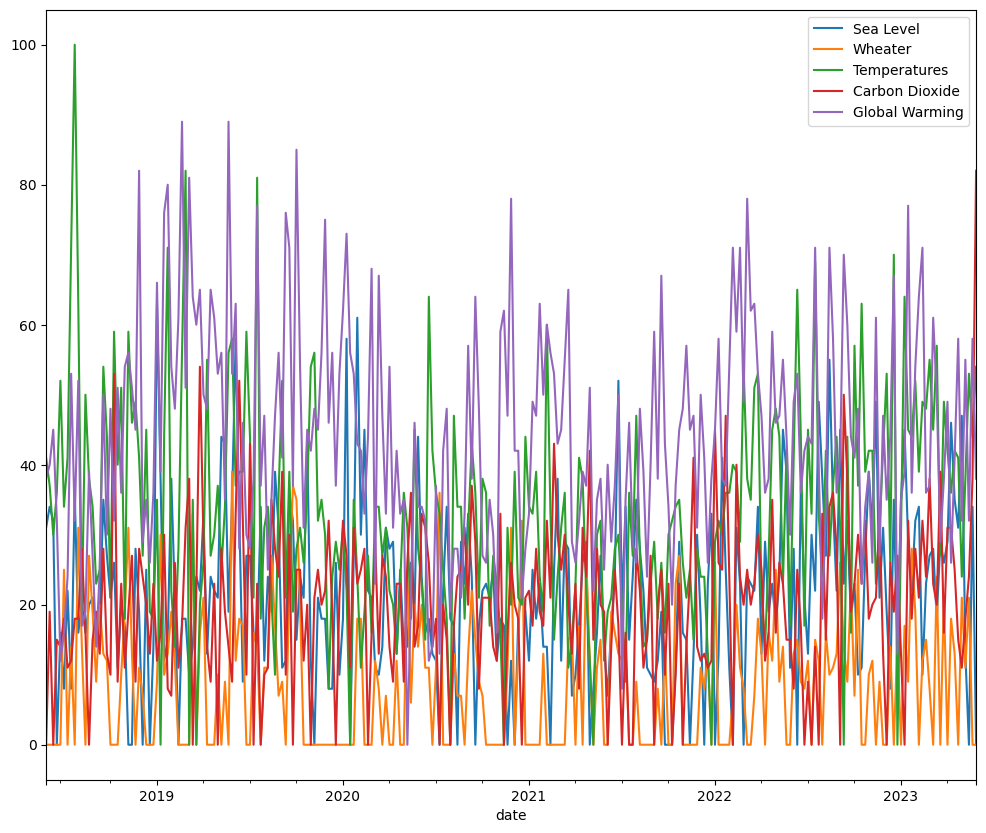

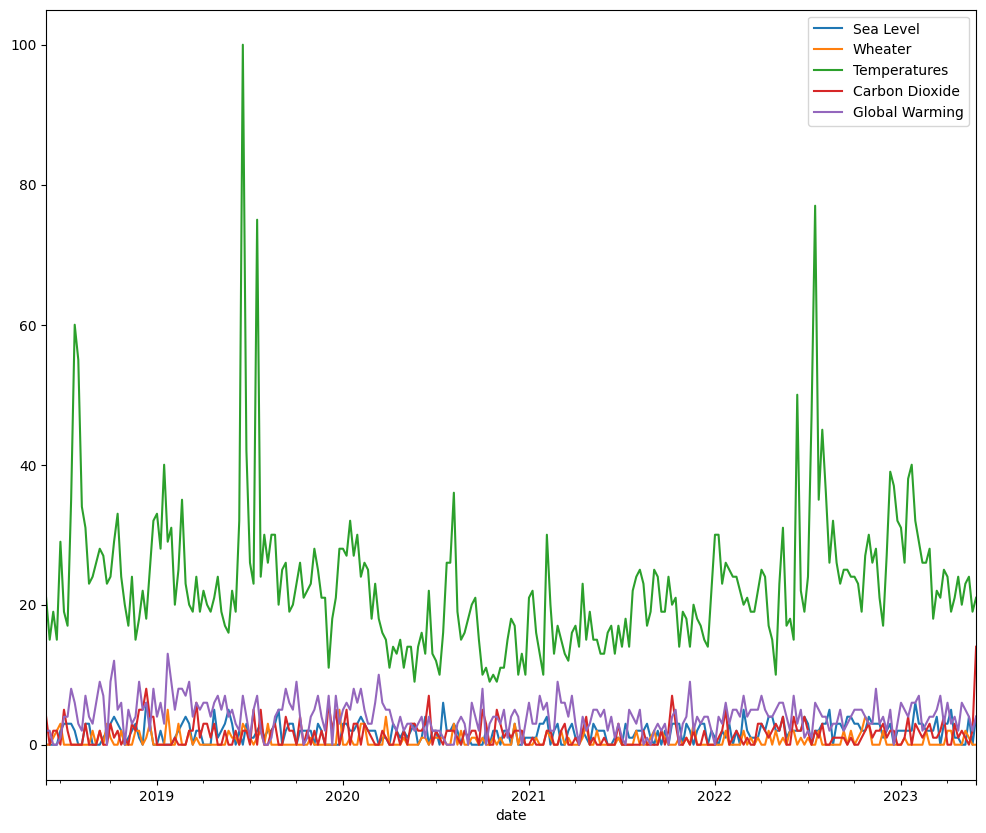

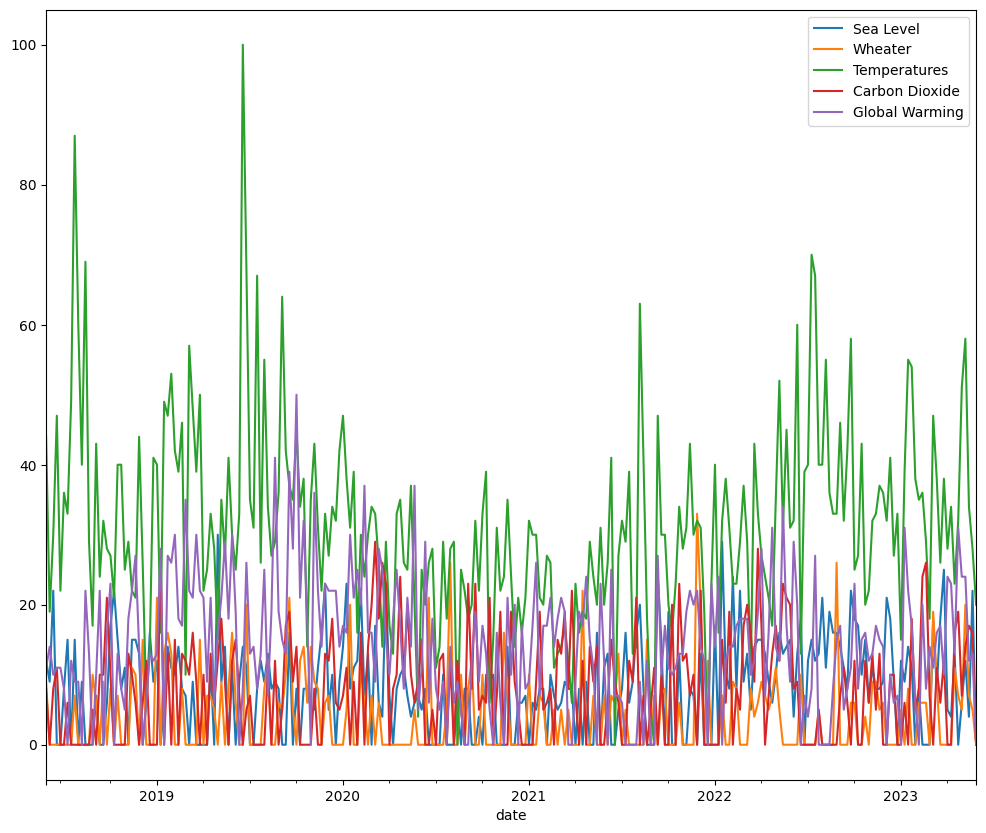

In [27]:
# para almacenar los dataframes en cada pais
lista_dfs=[]
#Pasamos todos los parámetros que queremos a la solicitud (filtrado), con el for recorremos la lista de paises
for i in paises:
    pytrends.build_payload(lista_palabras, cat=0, timeframe="today 5-y", geo=i)
    #librería de matplotlib para pasar estos datos a un gráfico 
    df = pytrends.interest_over_time()[lista_palabras]
    df.plot(figsize=(12, 10), y=lista_palabras)
    # Agregar columna de pais de interes
    df['País']= i
    # Crear columna fecha en el dataframe
    df['Fecha']= df.index
    # Resetear el indice
    df= df.reset_index(drop=True)
    # Agregar a la lista vacia
    lista_dfs.append(df)

lista_dfs

### Tabla fin del mundo

In [30]:
# para conectarse con cluster de AWS
!pip install redshift_connector 

                                              0.0/112.1 kB ? eta -:--:--
     ----------------------------------     102.4/112.1 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 112.1/112.1 kB 2.2 MB/s eta 0:00:00
                                              0.0/135.6 kB ? eta -:--:--
     -------------------------------------- 135.6/135.6 kB 3.9 MB/s eta 0:00:00
                                              0.0/10.8 MB ? eta -:--:--
                                              0.2/10.8 MB 7.3 MB/s eta 0:00:02
     -                                        0.5/10.8 MB 5.9 MB/s eta 0:00:02
     --                                       0.7/10.8 MB 6.1 MB/s eta 0:00:02
     ---                                      0.9/10.8 MB 6.2 MB/s eta 0:00:02
     ----                                     1.1/10.8 MB 5.9 MB/s eta 0:00:02
     ----                                     1.3/10.8 MB 5.6 MB/s eta 0:00:02
     -----                                    1.6/10.8 MB 5.6 MB/s e

In [35]:
# (Creando la conexion)
import os
import dotenv
import redshift_connector

# cargamos las variables de entorno
dotenv.load_dotenv()

# leemos las varaibles de entorno
usuario = os.getenv('User')
passwd = os.getenv('Password')
host = os.getenv('host')
database = os.getenv('db')

#conexión
conn = redshift_connector.connect(
     host=host,
     database=database,
     port=5439,
     user=usuario,
     password=passwd
  )
my_schema='federicobergada_coderhouse'

#regresa al inicio del programa, antes de la ejecución de estos cambios. De esta manera, no se deja ninguna operación a medias.
conn.rollback() 
conn.autocommit = True

#cursor
cursor = conn.cursor()

#Crea la tabla para cada pais
for i in paises:
    cursor.execute(f'CREATE TABLE if not exists {my_schema}. FIN_DEL_MUNDO_{i}(Sea Level INT,Wheater INT,Temperatures INT,Carbon_Dioxide INT,Global Warming INT,País VARCHAR(2),Fecha DATETIME)')

# Llenado de datos
for i in paises:
    sql = f'INSERT INTO {my_schema}.FIN_DEL_MUNDO_{i}(Sea Level,Wheater,Temperatures,Carbon_Dioxide,Global Warming,País,Fecha) VALUES(%s, %s, %s, %s, %s, %s, %s)'
    for k in range(len(lista_dfs[i].index)):
        list_item = []
        for j in range(7):
            list_item.append(list(lista_dfs[i].iloc[k])[j])
        cursor.execute(sql, list_item)
cursor.close()
conn.close()

InterfaceError: ('communication error', PermissionError(13, 'Intento de acceso a un socket no permitido por sus permisos de acceso', None, 10013, None))

In [32]:
lista_dfs[1].dtypes

Sea Level                  int32
Wheater                    int32
Temperatures               int32
Carbon Dioxide             int32
Global Warming             int32
País                      object
Fecha             datetime64[ns]
dtype: object

In [ ]:
for i in paises:
    